**Table of Content**
1. Collecting/Preparing Data
2. Data Cleaning
3. Exploratory Data Analysis
4. SLR vs MLR

# <center><font color=black>Collecting/Preparing Data </font></center>

Separated the data into two main parts named pre-COVID and post-COVID Data. Since covid19 was
discovered in the US during the early month of January 2020, we have the Restaurant customer reviews
generated from 2020-01-01 to 2021-01-31. For the pre-COVID data, the time period that we selected is of
the past 24 years of data which is before the pandemic started.
The following steps are carried out in order to fetch out the relevant data for this study.

1.The first step was to convert the json type file into csv file form and was done using python on
jupyter notebook using pandas library.

2.Postgresql (pgadmin 4) used for categorizing data based on restaurants and to make a new table to
get the restaurants and reviews as a single output table keeping Business ID as primary key.

3.During this process of forming a Restaurant reviews data table inner join, create table, like,
between &amp; copy format was used. The difficulty faced during this procedure was to access the
csv file and the error which occurred while importing the data.
Data that we have after carrying out the task, for pre-COVID analysis is *51,72,981* and for pandemic
duration i.e. post-COVID is *4,00,295*. We also have *8,00,437* observations of US covid data mentioning
the number of cases and deaths based on the country which will be used for further analysis.

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import date
from datetime import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
#to get path to the folder
!ls -al ../input/

total 8
drwxr-xr-x 4 root   root    4096 Mar 29 14:07 .
drwxr-xr-x 6 root   root    4096 Mar 29 14:07 ..
drwxr-xr-x 2 nobody nogroup    0 Mar 29 14:07 restaurant-reviews
drwxr-xr-x 2 nobody nogroup    0 Mar 29 14:07 us-covid19-dataset


In [3]:
#to read the data
post = pd.read_csv("../input/restaurant-reviews/postcovid_reviews.csv")
pre = pd.read_csv("../input/restaurant-reviews/precovid_reviews.csv")
us = pd.read_csv("../input/us-covid19-dataset/uscovidcleaned.csv")

In [4]:
post.head(2)

,business_id,name,address,state_,city,postal_code,latitude,longitude,stars,review_count,...,categories,hours,review_id,user_id,customer_stars,useful,funny,cool,text_,date_
0,2WRCcQATOe_Em0k61T6kvQ,Yook Korean Grilled BBQ & Bistro,2408 Nanaimo Street,BC,Vancouver,V5N 5E4,49.262732,-123.056371,4.0,74,...,"Restaurants, Barbeque, Korean","{'Monday': '0:0-0:0', 'Wednesday': '11:30-22:0...",t2I2CLHd7MpULwwqjPv0vA,iBRhL3g62aQzZ7nrJc-KCg,1,0,0,0,Decent food horrible service. I would give thi...,2020-02-15 21:09:17
1,oug5bLTWP_YTtj1C3_X6Xw,Gourdough's Public House,2700 S Lamar Blvd,TX,Austin,78704,30.245382,-97.780437,4.0,1534,...,"Karaoke, Pubs, Comfort Food, Bars, Gastropubs,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",gcJK-cQHFrrP1wnRUsQ9Jw,qcpg7m7V-5XgHZzdk_f_hQ,4,1,0,0,I've been wanting to try Gourdough's for a whi...,2020-09-30 01:17:12


In [5]:
pre.head(2)

,business_id,name,address,state_,city,postal_code,latitude,longitude,stars,review_count,...,categories,hours,review_id,user_id,customer_stars,useful,funny,cool,text_,date_
0,EXOsmAB1s71WePlQk0WZrA,Linwood Grill & BBQ Restaurant,69 Kilmarnock St,MA,Boston,02215,42.342541,-71.099522,2.5,14,...,Restaurants,NaN,28gGfkLs3igtjVy61lh77Q,Q8c91v7luItVB0cMFF_mRA,2,0,0,0,"The setting is perfectly adequate, and the foo...",2006-04-16 02:58:44
1,TA1KUSCu8GkWP9w0rmElxw,FLIP burger boutique,1587 Howell Mill Rd,GA,Atlanta,30318,33.798343,-84.415749,4.0,1909,...,"Burgers, Specialty Food, Restaurants, Barbeque...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'...",Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57


In [6]:
us.head()

,date,county,state_,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Snohomish,Washington,53061.0,1,0
4,2020-01-25,Snohomish,Washington,53061.0,1,0


# <center><font color=Black> Data Cleaning </font></center>

We started with the US covid dataset, in this we again use pgAdmin since the review dataset focussed on
*12* states in the USA we list out all the relevant states needed for the analysis from the uscovid dataset
using a in function in sql. Now the dataset reads *2,52,857* observations. Further checking the dataset we
found out that there were no null values.
Now to the post-COVID review dataset we found out that there were *13,224* null values.
These null values were in the column of restaurants address (*992*) and restaurants opening and closing
hours (*12,232*). Since we didn’t require these columns for analysis we used the drop function to omit
them from the dataset.
Further on looking at the dataset we found out that some of the cities were in UpperCase while others
were in LowerCase. To overcome this we first used a unique function to check the unique values of the
city in the dataset (*394* cities) and later on used the str.title() function to make them distinct (*361* cities).
Also, state abbreviation was converted into full name using replace function with dictionary. All this was
important for Tableau Analysis so as to read the state and city column for mapping.
There were *2,29,910* null values in the pre-COVID dataset.
These null values were in the column of restaurants address (*13,409*) and restaurants opening and closing
hours (*2,16,501*). The cleaning procedure is the same as what we did in the post-COVID dataset.

In [7]:
post['date_'] = pd.to_datetime(post['date_'])
pre['date_'] = pd.to_datetime(pre['date_'])

In [8]:
post['date'] = post['date_'].dt.date
pre['date'] = pre['date_'].dt.date

In [9]:
post = post.drop(columns = ['date_','address','hours','postal_code','review_id'])
pre = pre.drop(columns = ['date_','address','hours','postal_code','review_id'])

In [10]:
print(post.isnull().sum())
print('\n')
print(pre.isnull().sum())

business_id       0
name              0
state_            0
city              0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories        0
user_id           0
customer_stars    0
useful            0
funny             0
cool              0
text_             0
date              0
dtype: int64


business_id       0
name              0
state_            0
city              0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories        0
user_id           0
customer_stars    0
useful            0
funny             0
cool              0
text_             1
date              0
dtype: int64


In [11]:
pre = pre.dropna(how='any',axis=0) 

In [12]:
pre.isnull().sum().sum()

0

In [13]:
print(post.info())
print('\n')
print(pre.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400295 entries, 0 to 400294
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   business_id     400295 non-null  object 
 1   name            400295 non-null  object 
 2   state_          400295 non-null  object 
 3   city            400295 non-null  object 
 4   latitude        400295 non-null  float64
 5   longitude       400295 non-null  float64
 6   stars           400295 non-null  float64
 7   review_count    400295 non-null  int64  
 8   is_open         400295 non-null  int64  
 9   categories      400295 non-null  object 
 10  user_id         400295 non-null  object 
 11  customer_stars  400295 non-null  int64  
 12  useful          400295 non-null  int64  
 13  funny           400295 non-null  int64  
 14  cool            400295 non-null  int64  
 15  text_           400295 non-null  object 
 16  date            400295 non-null  object 
dtypes: float64

In [14]:
print(post.city.nunique())
print(pre.city.nunique())

394
450


In [15]:
post['city'] = post['city'].str.title()
pre['city'] = pre['city'].str.title()

In [16]:
print(post.city.nunique())
print(pre.city.nunique())

361
416


In [17]:
print(post.state_.unique())
print('\n')
print(pre.state_.unique())

['BC' 'TX' 'MA' 'GA' 'FL' 'OH' 'OR' 'WA' 'CO' 'NH' 'WY' 'VA' 'ABE' 'KY']


['MA' 'GA' 'BC' 'TX' 'OR' 'OH' 'FL' 'WA' 'CO' 'NH' 'WY' 'VA' 'ABE' 'MN'
 'KS' 'KY']


In [18]:
post=post.replace({'state_' : { 'KY' : 'Kentucky', 'BC':'British Columbia', 'TX':'Texas','MA': 'Massachusetts', 'GA':'Georgia',
                               'FL':'Florida','OH':'Ohio','OR': 'Oregon','WA': 'Washington','CO': 'Colorado',
                               'NH':'New Hampshire','WY':'Wyoming','VA': 'Virginia','ABE':'British Columbia',
                               'MN':'Minnesota','KS':'Kansas'}})
pre=pre.replace({'state_' : { 'KY' : 'Kentucky', 'BC':'British Columbia', 'TX':'Texas','MA': 'Massachusetts', 'GA':'Georgia',
                               'FL':'Florida','OH':'Ohio','OR': 'Oregon','WA': 'Washington','CO': 'Colorado',
                               'NH':'New Hampshire','WY':'Wyoming','VA': 'Virginia','ABE':'British Columbia',
                               'MN':'Minnesota','KS':'Kansas'}})

In [19]:
print(post.state_.unique())
print('\n')
print(pre.state_.unique())

['British Columbia' 'Texas' 'Massachusetts' 'Georgia' 'Florida' 'Ohio'
 'Oregon' 'Washington' 'Colorado' 'New Hampshire' 'Wyoming' 'Virginia'
 'Kentucky']


['Massachusetts' 'Georgia' 'British Columbia' 'Texas' 'Oregon' 'Ohio'
 'Florida' 'Washington' 'Colorado' 'New Hampshire' 'Wyoming' 'Virginia'
 'Minnesota' 'Kansas' 'Kentucky']


In [20]:
post.describe()

,latitude,longitude,stars,review_count,is_open,customer_stars,useful,funny,cool
count,400295.000000,400295.000000,400295.000000,400295.000000,400295.000000,400295.000000,400295.000000,400295.000000,400295.000000
mean,37.011519,-92.123888,3.891921,388.457995,0.972428,3.871385,0.754911,0.225032,0.474917
std,6.996261,18.137032,0.643716,662.052221,0.163744,1.473821,2.971978,1.459822,2.570033
min,28.062985,-123.349961,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.262073,-97.841182,3.500000,74.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,33.894606,-84.364389,4.000000,186.000000,1.000000,5.000000,0.000000,0.000000,0.000000
75%,42.421545,-81.365769,4.500000,429.000000,1.000000,5.000000,1.000000,0.000000,0.000000
max,49.395121,71.113271,5.000000,9185.000000,1.000000,5.000000,446.000000,264.000000,348.000000


In [21]:
pre.describe()

,latitude,longitude,stars,review_count,is_open,customer_stars,useful,funny,cool
count,5.172197e+06,5.172197e+06,5.172197e+06,5.172197e+06,5.172197e+06,5.172197e+06,5.172197e+06,5.172197e+06,5.172197e+06
mean,3.842485e+01,-9.279532e+01,3.737668e+00,5.150457e+02,7.566645e-01,3.738604e+00,1.001601e+00,3.974881e-01,4.856613e-01
std,6.950450e+00,1.966676e+01,5.848754e-01,8.445934e+02,4.290960e-01,1.354613e+00,2.582966e+00,1.774617e+00,2.186925e+00
min,2.806298e+01,-1.233500e+02,1.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.035109e+01,-1.225374e+02,3.500000e+00,1.160000e+02,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.220142e+01,-8.437206e+01,4.000000e+00,2.700000e+02,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.540875e+01,-7.139743e+01,4.000000e+00,5.640000e+02,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.945962e+01,7.111327e+01,5.000000e+00,9.185000e+03,1.000000e+00,5.000000e+00,3.980000e+02,6.100000e+02,7.320000e+02


# <center><font color=black>Exploratory Data Analysis </font></center>

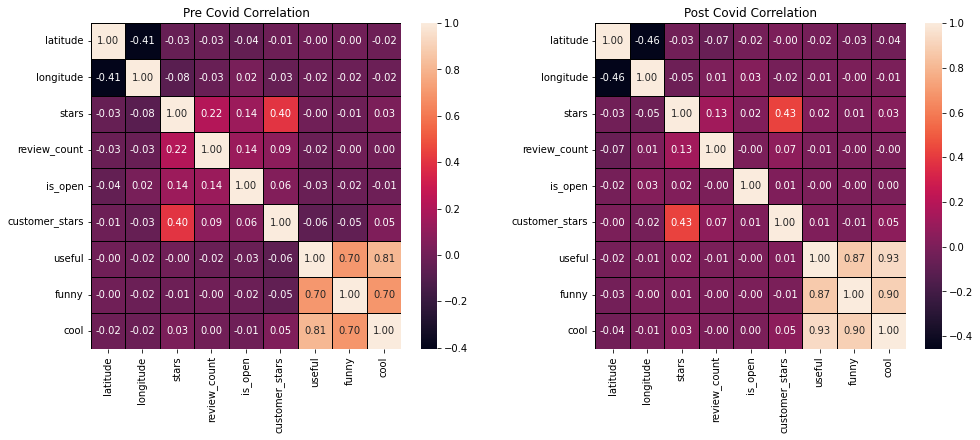

In [22]:
# Plotting the Heatmap of the columns using correlation matrix
f,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2, = ax.flatten()

sns.heatmap(pre.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax1)
ax1.set_title('Pre Covid Correlation')

sns.heatmap(post.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax2)
ax2.set_title('Post Covid Correlation')

plt.subplots_adjust(wspace=0.3)

Text(0.5, 1.0, 'Top reviews count State wise')

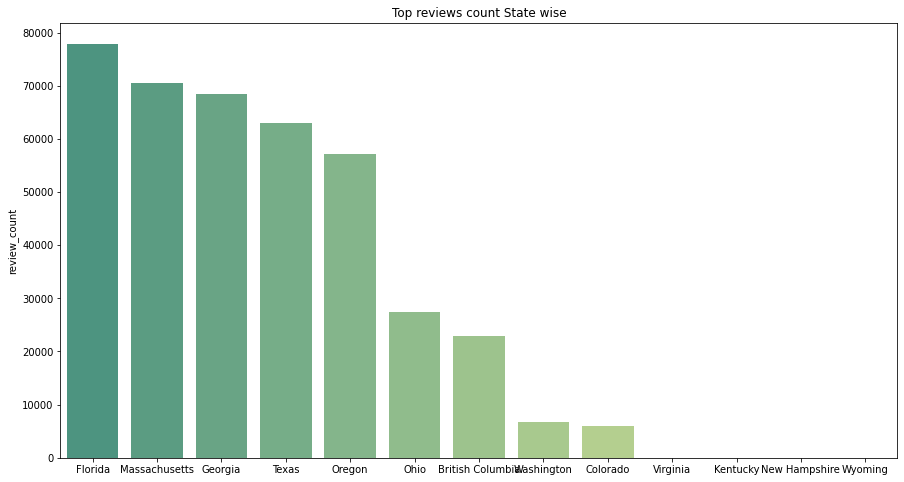

In [23]:
r = post[['state_','review_count']]
name_wise = r.groupby(['state_'],as_index=False).count().sort_values("review_count", ascending=False)
name_wise=name_wise.iloc[0:20]

plt.figure(figsize = (15,8))
sns.barplot(data=name_wise,x="state_", y="review_count",alpha=0.8, palette = 'summer')

plt.xlabel('')
plt.title('Top reviews count State wise')

Text(0.5, 0, 'City')

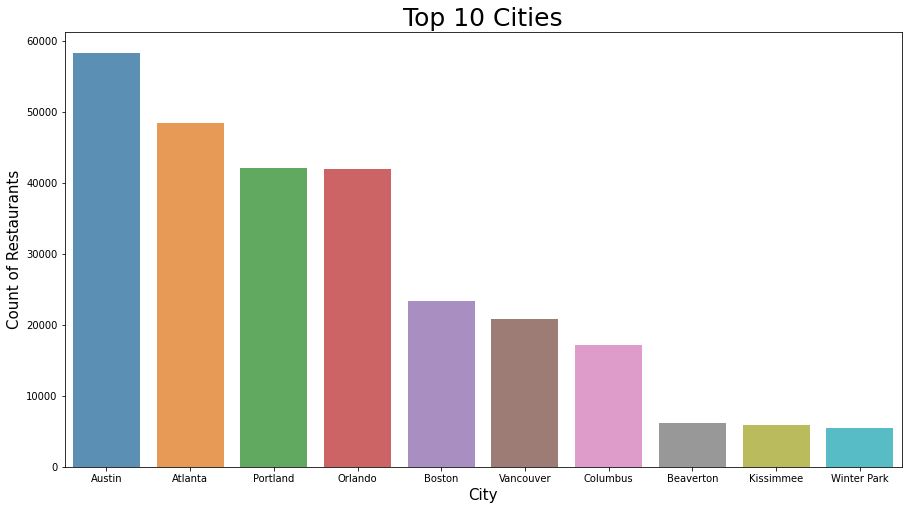

In [24]:
c = post[['city','business_id']]
city_wise = c.groupby(['city'],as_index=False).count().sort_values("business_id", ascending=False)
city_wise=city_wise.iloc[0:10]

plt.figure(figsize=(15,8))
plt2 = sns.barplot(data=city_wise,x="city", y="business_id",alpha=0.8)
plt.title("Top 10 Cities",fontsize=25)
plt.ylabel('Count of Restaurants', fontsize=15)
plt.xlabel('City', fontsize=15)

**Change in Review Count:**
We started with the analysis of the review count timeline. Showing the change in the review count by number of days during the pre-COVID and post-COVID duration. We can clearly analyze that the effect of Covid was seen in the USA during the mid of March 2020 as there is a big decline in the daily number of review count when compared to the pre covid timeline.

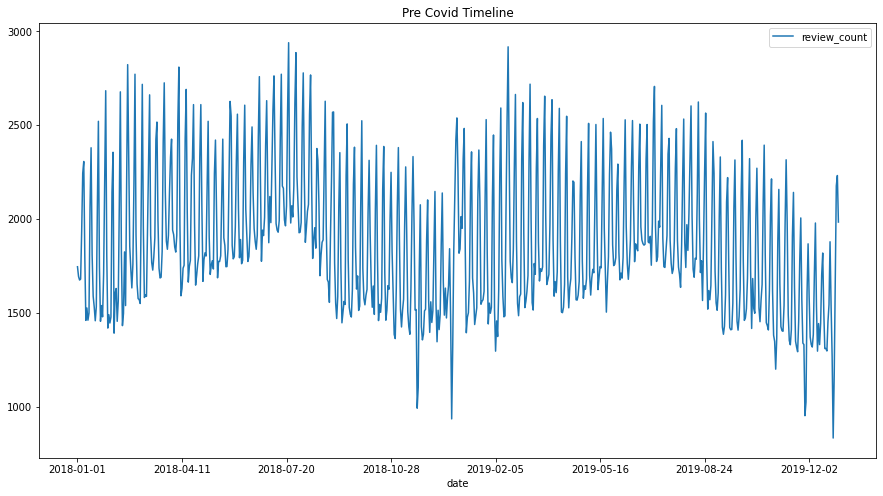

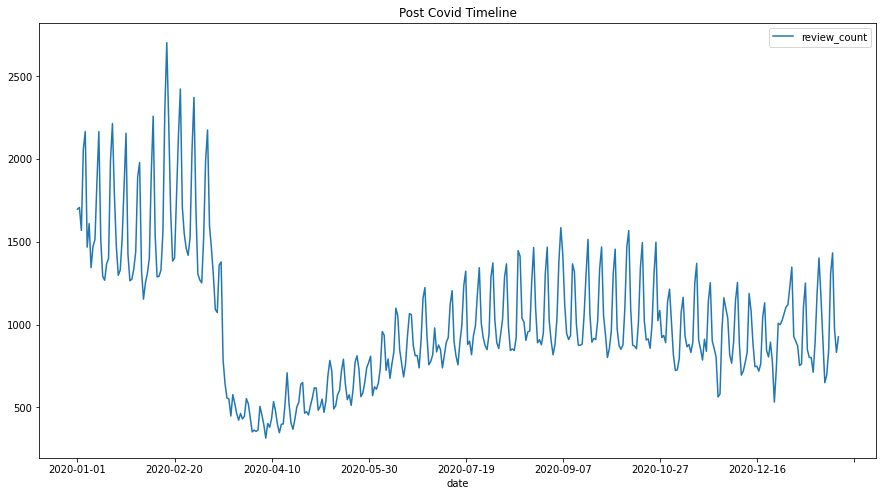

In [25]:
pre_sort=pre.sort_values(by='date')
pre_sort.set_index("date", inplace=True)
startdate = pd.to_datetime("2018-01-01").date()
enddate = pd.to_datetime("2019-12-31").date()
pre_=pre_sort.loc[startdate:enddate]
pre_.reset_index(inplace=True)
pre_['date'] = pd.to_datetime(pre_['date'], errors='coerce')
d1 = pre_[['review_count']]
datewise1 = d1.groupby(pre_['date'].dt.strftime('%Y-%m-%d'),as_index=True).count()

datewise1.plot(figsize=(15, 8))
plt.legend(loc='best')
plt.title('Pre Covid Timeline')
plt.show()

post['date'] = pd.to_datetime(post['date'], errors='coerce')
d = post[['review_count']]
datewise = d.groupby(post['date'].dt.strftime('%Y-%m-%d'),as_index=True).count()

datewise.plot(figsize=(15, 8))
plt.legend(loc='best')
plt.title('Post Covid Timeline')
plt.show()

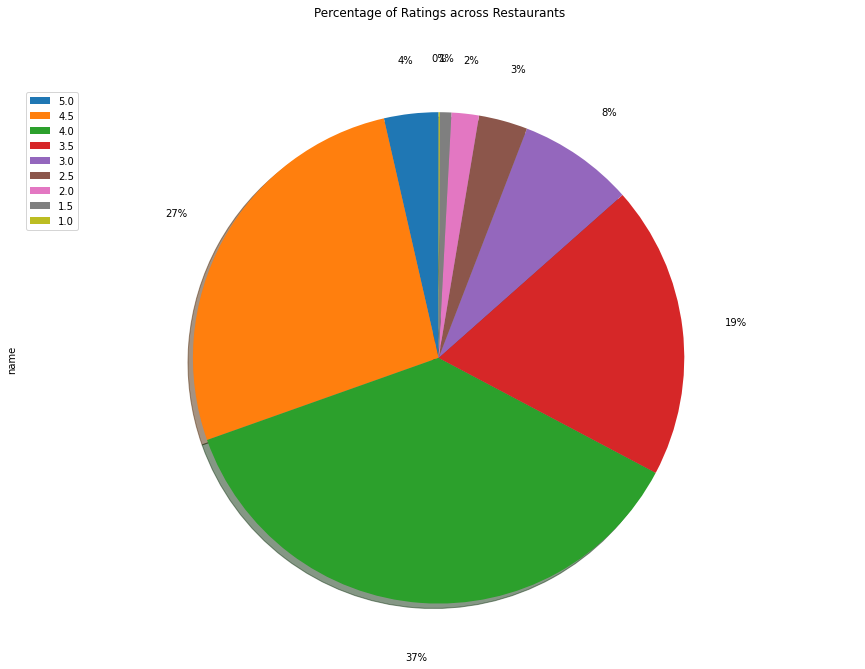

In [26]:
s = post[['stars','name']]
stars_wise = s.groupby(['stars'],as_index=True).count().sort_values("stars", ascending=False)
star=list(stars_wise.index.values)
count=list(stars_wise['name'])
stars_wise['name'].plot(kind='pie',
                            figsize=(15, 10),
                            autopct='%1.f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.22,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Percentage of Ratings across Restaurants', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=stars_wise.index, loc='upper left') 

plt.show()

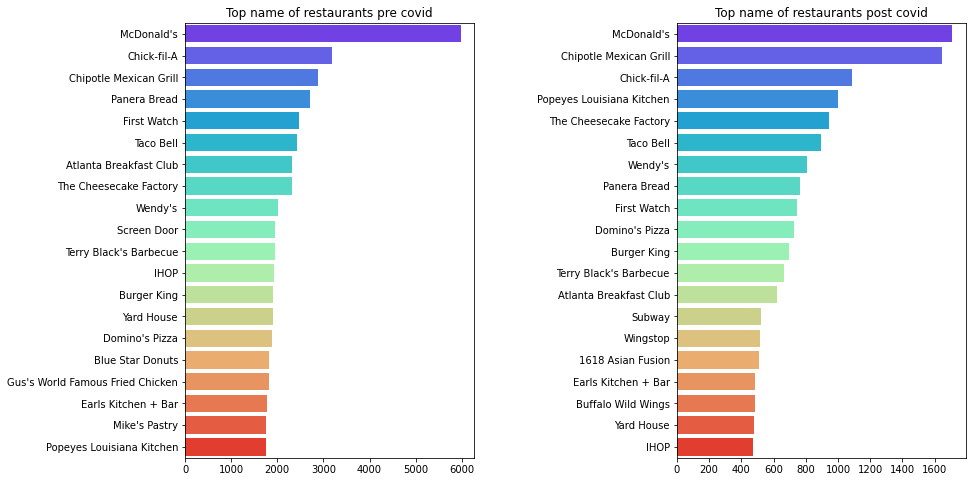

In [27]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
c = pre_['name'].value_counts()[:20].to_frame()

sns.barplot(c['name'], c.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top name of restaurants pre covid')

c = post['name'].value_counts()[:20].to_frame()

sns.barplot(c['name'], c.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top name of restaurants post covid')
plt.subplots_adjust(wspace=0.7)

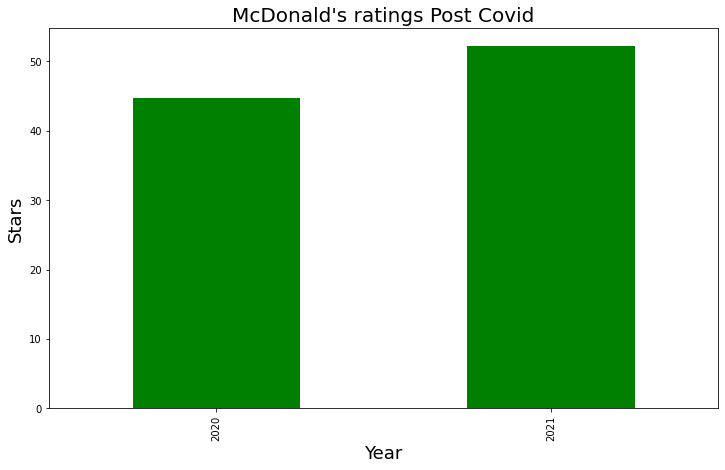

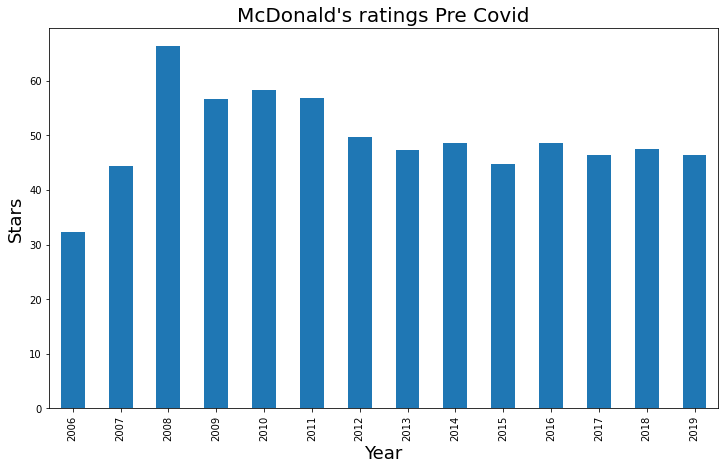

In [28]:
mcdonalds = post.loc[post['name'] == 'McDonald\'s']
mcdonalds.groupby(mcdonalds.date.dt.year)['review_count'].mean().plot(kind='bar', figsize=(12, 7), color='green')

plt.title("McDonald's ratings Post Covid", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
plt.show()

mcdonalds = pre.loc[pre['name'] == 'McDonald\'s']
mcdonalds.date = pd.to_datetime(mcdonalds.date)
mcdonalds.groupby(mcdonalds.date.dt.year)['review_count'].mean().plot(kind='bar', figsize=(12, 7))

plt.title("McDonald's ratings Pre Covid", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
plt.show()

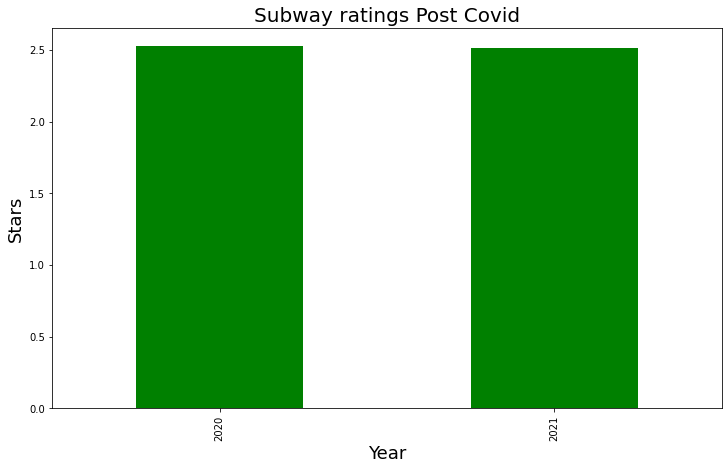

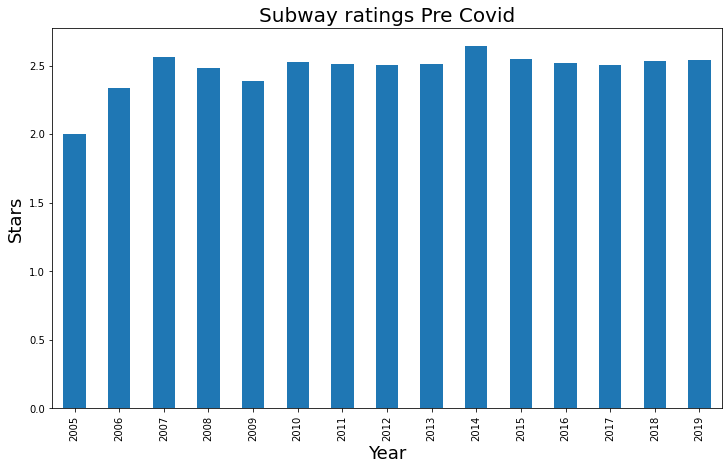

In [29]:
subway = post.loc[post['name'] == 'Subway']
subway.groupby(subway.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7), color='green')

plt.title("Subway ratings Post Covid", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
plt.show()

subway = pre.loc[pre['name'] == 'Subway']
subway.date = pd.to_datetime(subway.date)
subway.groupby(subway.date.dt.year)['stars'].mean().plot(kind='bar', figsize=(12, 7))
plt.title("Subway ratings Pre Covid", fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Stars', fontsize=18)
plt.show()

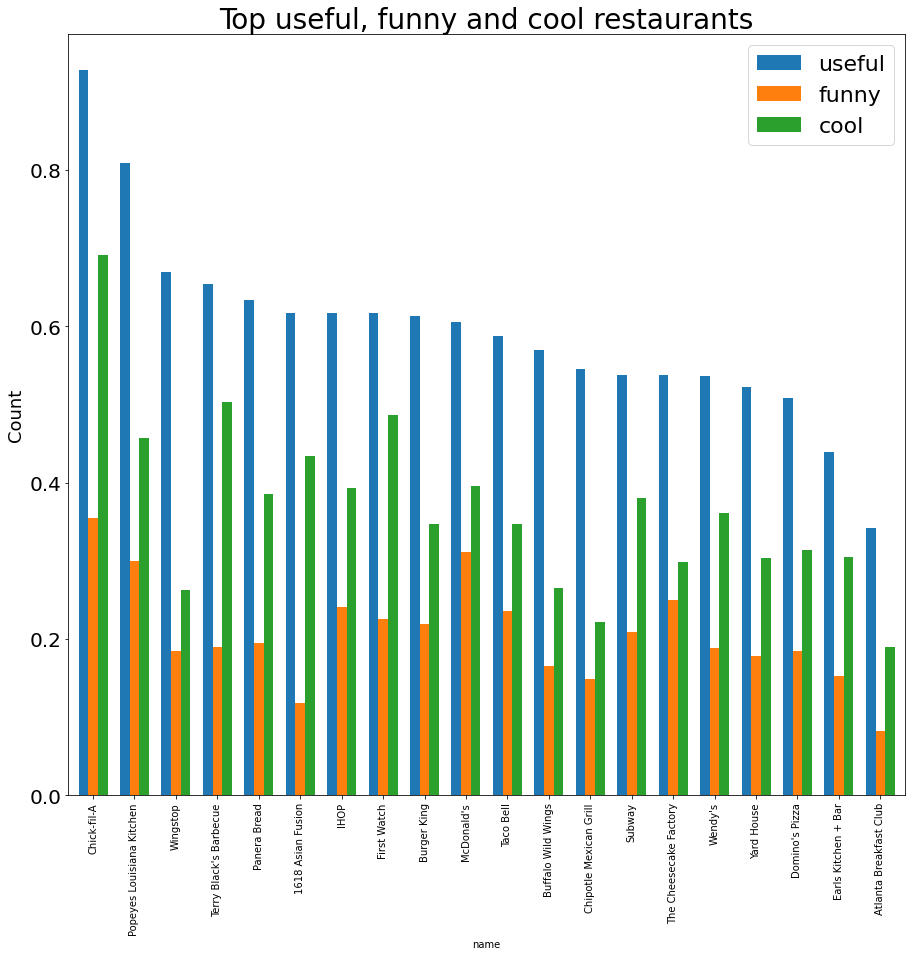

In [30]:
restaurants = post.name.value_counts().index[:20].tolist()
review_top = post.loc[post['name'].isin(restaurants)]
review_top.groupby(review_top.name)[['useful','funny', 'cool']].mean().sort_values('useful',ascending=False).plot(kind='bar' ,figsize=(15, 14),width=0.7)
plt.yticks(fontsize=18)
plt.title('Top useful, funny and cool restaurants',fontsize=28)
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=20)
plt.legend(fontsize=22)
plt.show()

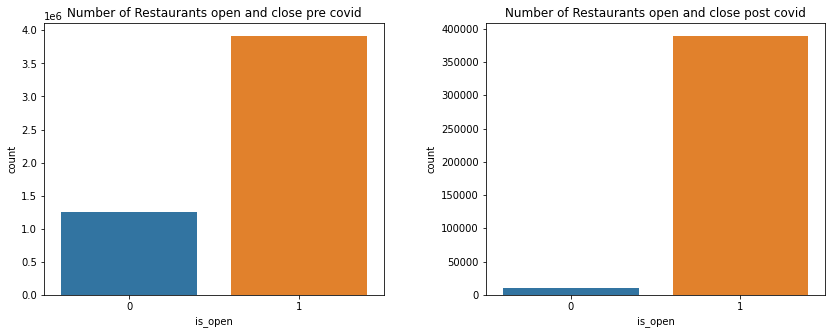

In [31]:
f,ax=plt.subplots(1,2,figsize=(14,5))
ax1,ax2, = ax.flatten()
sns.countplot(pre['is_open'],ax=ax1)
ax1.set_title('Number of Restaurants open and close pre covid')

sns.countplot(post['is_open'],ax=ax2)
ax2.set_title('Number of Restaurants open and close post covid')
plt.subplots_adjust(wspace=0.3)

(-0.5, 1439.5, 1079.5, -0.5)

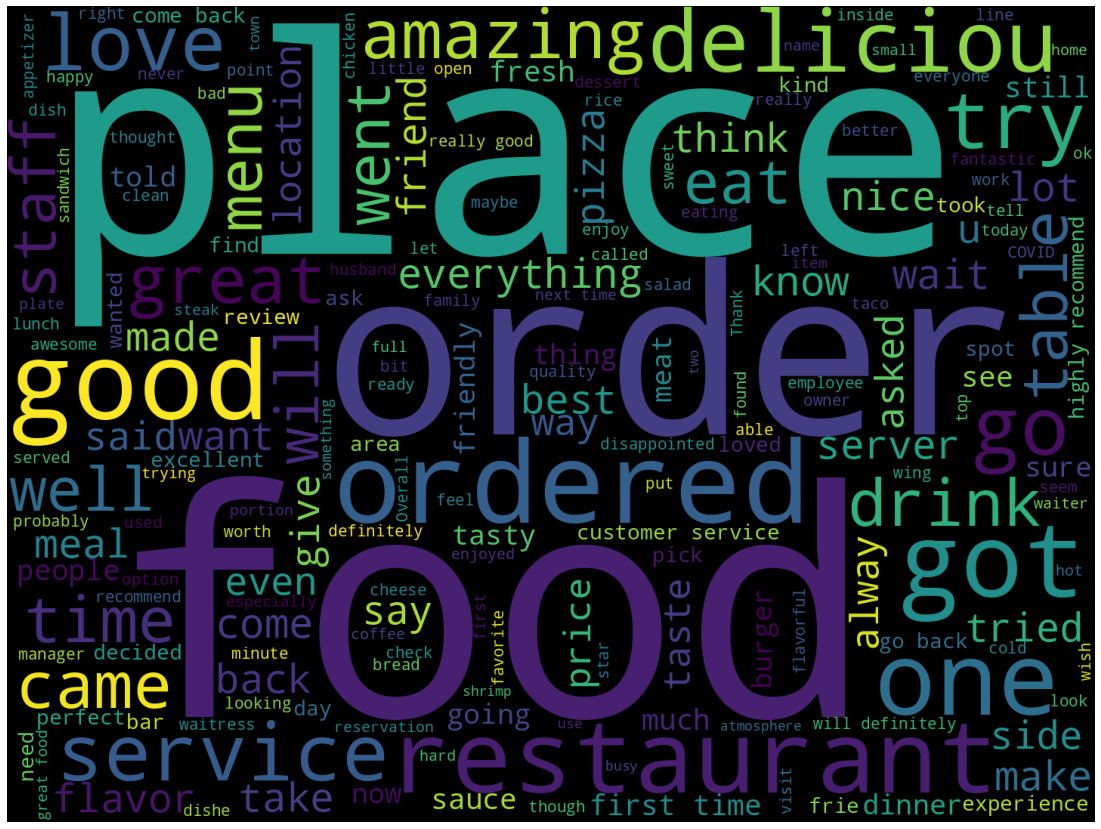

In [32]:
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(post['text_'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

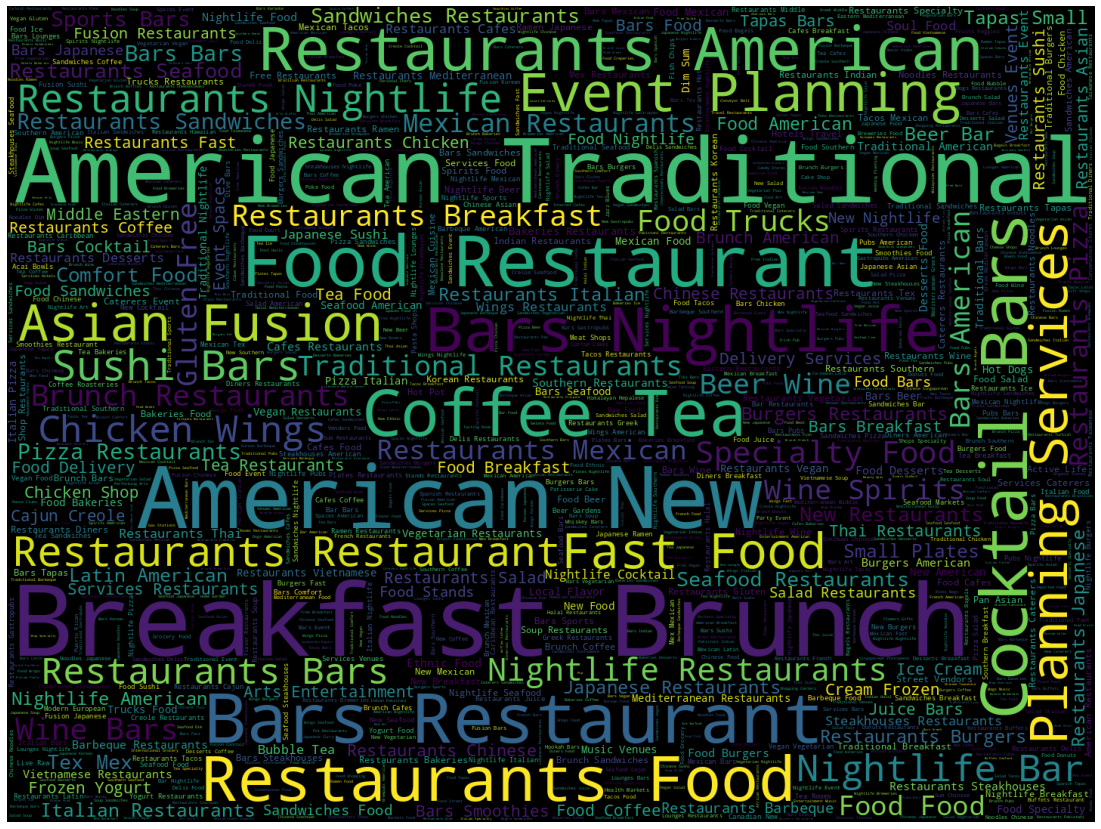

In [33]:
cloud = WordCloud(width=1440, height= 1080,max_words= 1000).generate(' '.join(post['categories'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# <center><font color=black>SLR vs MLR </font></center>

**Data Analysis:**
Further for Analysis part we grouped the data State wise taking cases, deaths, review_count and is_open as our variables.

In [34]:
scd = us[['state_','cases','deaths']]
grouped_test1 = scd.groupby(['state_'],as_index=False).sum()

ri = post[['state_','review_count','is_open']]
grouped_test2 = ri.groupby(['state_'],as_index=False).sum()
grouped_test2 = grouped_test2.drop(0)

df = pd.merge(grouped_test2, grouped_test1)
df.head(12)

,state_,review_count,is_open,cases,deaths
0,Colorado,1738977,5795,15548407,432353
1,Florida,27309688,76164,107316623,2101392
2,Georgia,30902439,66820,47692834,1103484
3,Kentucky,22,2,12582434,217714
4,Massachusetts,27152945,68666,29233443,1919533
5,New Hampshire,34,2,1817651,86219
6,Ohio,4788955,26861,29229083,855744
7,Oregon,24577800,54715,5741680,94902
8,Texas,33994944,61104,119483867,2261900
9,Virginia,28,4,24999790,549459


**1.Correlation:**
To check the correlation between review count, cases and deaths. For this we
combined the dataset of post-COVID and USA covid using groupby function in python state wise and
formed a new dataset having column review count, cases and deaths.
For this we used the Pearson correlation.
After analysis
a)Review Count and Cases
The Pearson Correlation Coefficient is 0.7006474748704289 with a P-value of P =
0.011149912451599887
b)Review Count and Deaths
The Pearson Correlation Coefficient is 0.7699278263748179 with a P-value of P =
0.0033990330082125137
We can clearly see that both the correlation result shows a moderate positive correlation with a very
significant p value.
Even though we see a positive correlation we cannot conclude that there is a relationship between how
cases and deaths affect the review count. In order to check this we used SLR and MLR for further
analysis since correlation doesn’t imply causation.

In [35]:
#checking the correlation 
df.corr()

,review_count,is_open,cases,deaths
review_count,1.000000,0.967866,0.700647,0.769928
is_open,0.967866,1.000000,0.677778,0.791499
cases,0.700647,0.677778,1.000000,0.885460
deaths,0.769928,0.791499,0.885460,1.000000


In [36]:
pearson_coef, p_value = stats.pearsonr(df['review_count'], df['cases'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.700647474870429  with a P-value of P = 0.01114991245159987


In [37]:
pearson_coef, p_value = stats.pearsonr(df['review_count'], df['deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7699278263748179  with a P-value of P = 0.0033990330082125137


In [38]:
pearson_coef, p_value = stats.pearsonr(df['review_count'], df['is_open'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9678657178023864  with a P-value of P = 2.556763910615354e-07


**2.SLR vs MLR:**
Simple linear regression vs Multiple linear regression
For SLR we used review count as dependent variable and cases as independent variable. Such that when
we perform linear regression in python using OLS or sklearn package we get the value of R and adj R
along with the p-value.
Now for MLR we used review count as a dependent variable and cases, deaths and is_open (restaurants
that were open post-COVID) as independent variables. We followed the same process for this as well and
saw a significant change in the value of R and adj R along with the p-value.
Further on we have also shown a distribution plot for SLR and MLR showing the difference between both
the models. These models help us to understand the change in the distribution of graphs by comparing the
actual value to the fitted value.
Results after analysis.
Left graph shows the distribution graph for SLR.
Right graph shows the distribution graph for MLR.
Hence we can conclude that here MLR provides us with much better insights as compared to SLR due to
an additional independent variable (is_open) in MLR.
As R square shows the goodness of fit in MLR better and also we have a statistically significant p value
for is_open we can say that there is a relationship between the number of review counts going down due
to the fact of restaurants getting closed instead of the number of cases and deaths.
However we can also see that there is also a relationship between number of cases and the number of
review counts in SLR but we have a moderate goodness of fit.

**Simple Linear Regression (SLR)**

In [39]:
lm = LinearRegression()
X = df[['cases']]
Y = df['review_count']
lm.fit(X,Y)
Yhat=lm.predict(X)
print(Yhat[0:5])   
print('Intercept:',lm.intercept_)
print('Coefficient:',lm.coef_)

[ 7813748.15303507 31493905.66766705 16108396.64633899  7048399.20232488
 11345077.6503134 ]
Intercept: 3801588.574149862
Coefficient: [0.25804313]


In [40]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     9.643
Date:                Tue, 29 Mar 2022   Prob (F-statistic):             0.0111
Time:                        14:14:45   Log-Likelihood:                -210.31
No. Observations:                  12   AIC:                             424.6
Df Residuals:                      10   BIC:                             425.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.802e+06   4.23e+06      0.899      0.3

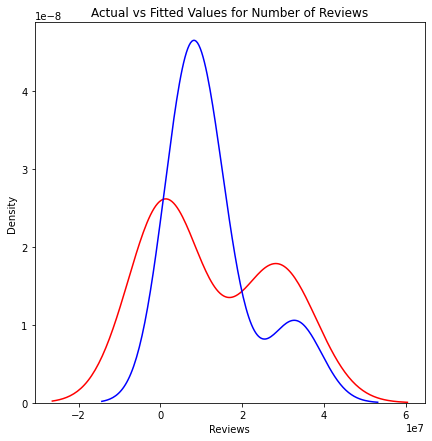

In [41]:
#Distribution plot
width=7
height=7
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['review_count'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Number of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Density')

plt.show()
plt.close()

**Multiple Linear Regression (MLR)**

In [42]:
Z = df[['cases','is_open']]
lm.fit(Z, df['review_count'])
Y_hat=lm.predict(Z)
print(Y_hat[0:5])   
print('Intercept:',lm.intercept_)
print('Coefficient:',lm.coef_)

[ 1870641.14661507 33655554.8308859  27992025.30054202  -606418.70489166
 28191132.19254197]
Intercept: -989966.8927686438
Coefficient: [3.04173377e-02 4.12021897e+02]


In [43]:
Z2 = sm.add_constant(Z)
est = sm.OLS(Y, Z2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           review_count   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     71.07
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           3.07e-06
Time:                        14:14:46   Log-Likelihood:                -197.44
No. Observations:                  12   AIC:                             400.9
Df Residuals:                       9   BIC:                             402.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -9.9e+05   1.63e+06     -0.607      0.5

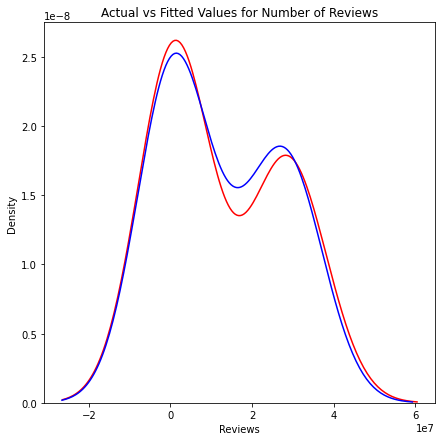

In [44]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['review_count'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Number of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Density')

plt.show()
plt.close()